In [116]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error


warnings.filterwarnings("ignore")


In [117]:
df  = pd.read_csv('/content/IBM_DATA.csv')

In [118]:
df .head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [109]:
#check null value
print(df.isnull().sum())

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64


In [110]:
#drop null value
df = df.dropna()
print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [128]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [129]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [131]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [132]:
# Filter the data up to 2016 for training and 2017 for testing
train = df.loc[:'2016-12-31']
test = df.loc['2017-01-01':]

In [133]:
 #Select the Feature (High Prices)
train = train_data[['High']]
test = test_data[['High']]


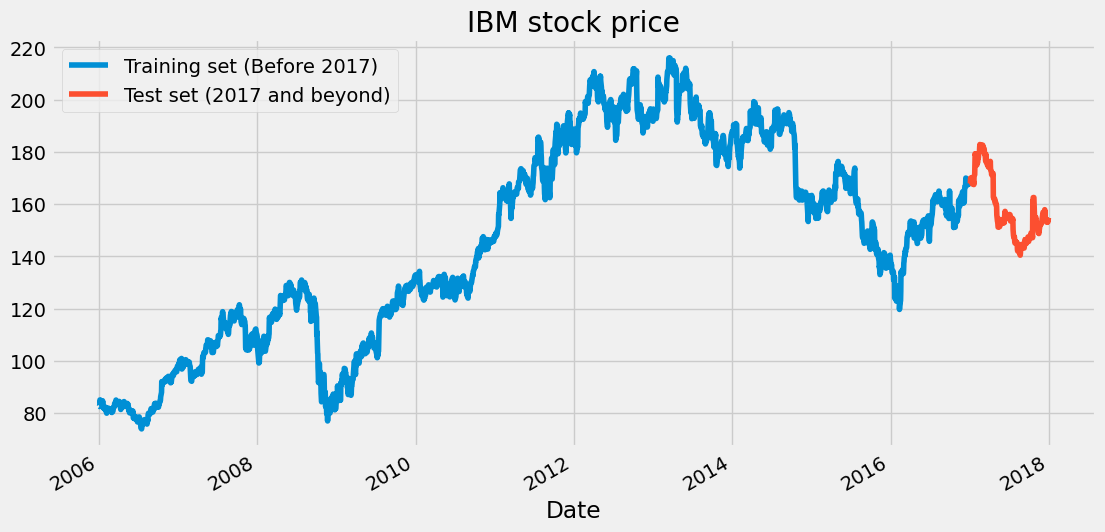

In [150]:
df["High"][:'2016'].plot(figsize=(12,6),legend=True)
df["High"]['2017':].plot(figsize=(12,6),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [135]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [139]:
# Create Sequences for Time-Series Forecasting
time_step = 60

def create_sequences(data, time_step):
    X = []
    y = []
    # The range should start from time_step and end at the length of the data
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Past 'seq_length' values
        y.append(data[i, 0])  # Next value (target)
    return np.array(X), np.array(y)

In [140]:
#Create Training and Testing Sequences
X_train, y_train = create_sequences(train_scaled, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [141]:
X_train.shape

(2709, 60, 1)

In [142]:
X_test.shape

(191, 60, 1)

In [144]:
def prepare_and_predict(model, data, scaler, time_step):
    """
    Prepares the input data for the model and makes predictions.

    Parameters:
    model: The trained model (e.g., LSTM_model, RNN_model, etc.)
    data: The original data (Pandas DataFrame) to get the high prices from.
    scaler: The scaler used for normalization (MinMaxScaler).
    time_step: The number of time steps to consider for the LSTM/RNN model.

    Returns:
    predicted_prices: The predicted prices after inverse transformation.
    """
    inputs = data["High"][len(data) - len(test) - time_step:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(time_step, len(inputs)):
        X_test.append(inputs[i-time_step:i, 0])

    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    return predicted_prices

# Building and Evaluating the LSTM Model¶





In [145]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(units=100, return_sequences=True))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(LSTM(units=100, return_sequences=False))
LSTM_model.add(Dropout(0.3))
LSTM_model.add(Dense(units=1))

In [66]:
#Reshape Data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [146]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - loss: 0.0380
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - loss: 0.0036
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - loss: 0.0041
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - loss: 0.0037
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 16s 184ms/step - loss: 0.0034
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - loss: 0.0032
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - loss: 0.0031
Epoch 8/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - loss: 0.0029
Epoch 9/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - loss: 0.0027
Epoch 10/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - loss: 0.0028
Epoch 11/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 163ms/step - loss: 0.0023
Epoch 12/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - loss: 0.0023
Epoch 13/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - loss: 0.0022
Epoch 14/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - loss: 0.0024
Epoch 15/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


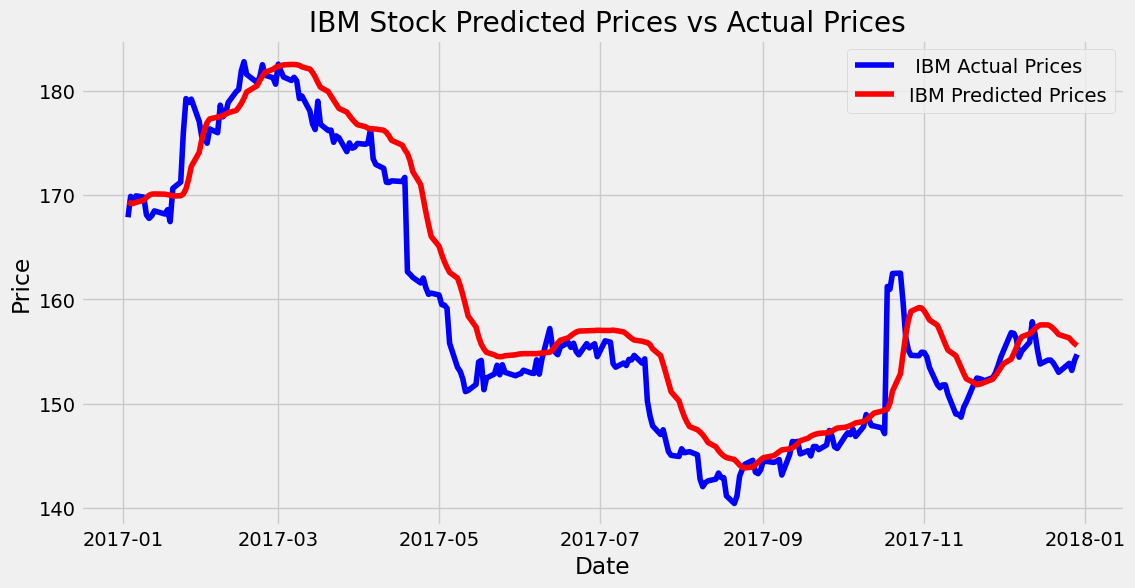




========================== root mean squared error==========================


the root mean squared error is : 3.701323638461752.


In [164]:
predicted_prices = prepare_and_predict(LSTM_model, df, scaler, time_step)

plt.figure(figsize=(12, 6))
plt.plot(df.loc['2017':].index, test, color='blue', label=' IBM Actual Prices')
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='IBM Predicted Prices')
plt.title(" IBM Stock Predicted Prices vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

print("\n")

print("\n========================== root mean squared error==========================")

print("\n")


return_rmse(test, predicted_prices)

# Building and Evaluating the RNN Model¶


In [153]:
# Build RNN  Model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
RNN_model.add(Dropout(0.3))
RNN_model.add(SimpleRNN(units=100, return_sequences=True))
RNN_model.add(Dropout(0.3))
RNN_model.add(SimpleRNN(units=100, return_sequences=False))
RNN_model.add(Dropout(0.3))
RNN_model.add(Dense(units=1))


# Summary of the model
RNN_model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 60, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 60, 100)             │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,501 (197.27 KB)

 Trainable params: 50,501 (197.27 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
RNN_model.compile(optimizer='adam', loss='mean_squared_error')

In [155]:
RNN_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.3751
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 0.1065
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0554
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 0.0326
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - loss: 0.0217
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0165
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - loss: 0.0136
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 0.0110
Epoch 9/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0099
Epoch 10/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0081
Epoch 11/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0069
Epoch 12/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0067
Epoch 13/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - loss: 0.0055
Epoch 14/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0054
Epoch 15/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss:

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


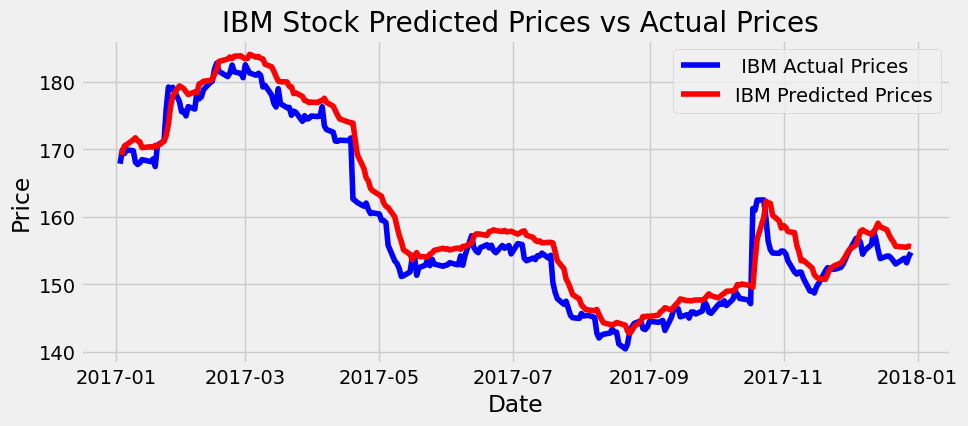




========================== root mean squared error==========================


the root mean squared error is : 3.08681859825496.


In [165]:
predicted_prices = prepare_and_predict(RNN_model, df, scaler, time_step)

real_prices = df['2017':].iloc[:, 1:2].values

plt.figure(figsize=(10, 4))
plt.plot(df.loc['2017':].index, test, color='blue', label=' IBM Actual Prices')
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='IBM Predicted Prices')
plt.title(" IBM Stock Predicted Prices vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

print("\n")

print("\n========================== root mean squared error==========================")

print("\n")

return_rmse(test, predicted_prices)

# Building and Evaluating the GRU Model


In [169]:
GRU_model = Sequential()
GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(units=50, activation='tanh'))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(units=1))


In [170]:
RNN_model.compile(optimizer='adam', loss='mean_squared_error')
RNN_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0058
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0023
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0018
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 0.0017
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - loss: 0.0020
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0020
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0020
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0021
Epoch 9/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - loss: 0.0015
Epoch 10/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.0016
Epoch 11/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0014
Epoch 12/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0013
Epoch 13/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0014
Epoch 14/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0015
Epoch 15/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.0

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


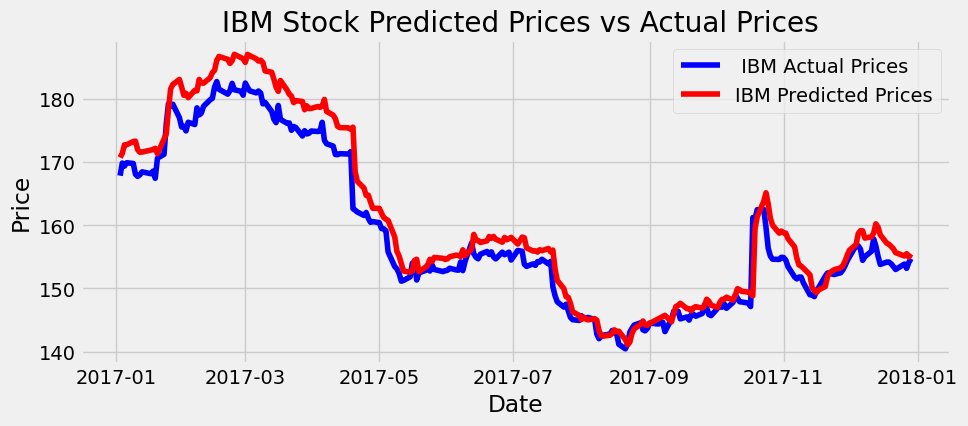




========================== root mean squared error==========================


the root mean squared error is : 3.355978166593293.


In [171]:
predicted_prices = prepare_and_predict(RNN_model, df, scaler, time_step)

real_prices = df['2017':].iloc[:, 1:2].values

plt.figure(figsize=(10, 4))
plt.plot(df.loc['2017':].index, test, color='blue', label=' IBM Actual Prices')
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='IBM Predicted Prices')
plt.title(" IBM Stock Predicted Prices vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

print("\n")

print("\n========================== root mean squared error==========================")

print("\n")

return_rmse(test, predicted_prices)